In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [3]:
os.listdir('/kaggle/input/az-handwritten-alphabets-in-csv-format')

['A_Z Handwritten Data.csv', 'A_Z Handwritten Data']

In [4]:
df=pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [5]:
import cv2
import seaborn as sb
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras .optimizers import SGD,Adam
from keras .utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
df.shape

(372450, 785)

In [7]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#rename class colum
df.rename(columns={'0':'label'},inplace=True)
df.head()


,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#split data
X = df.drop('label',axis=1)
y = df.label
print(f'Features SHAPE :{X.shape}')
print(f'Class Column SHAPE:{y.shape}')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

Features SHAPE :(372450, 784)
Class Column SHAPE:(372450,)


((297960, 784), (74490, 784), (297960,), (74490,))

In [10]:

print(f'Features:{X}')

Features:        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0         0    0    0    0    0    0    0    0    0     0  ...      0      0   
1         0    0    0    0    0    0    0    0    0     0  ...      0      0   
2         0    0    0    0    0    0    0    0    0     0  ...      0      0   
3         0    0    0    0    0    0    0    0    0     0  ...      0      0   
4         0    0    0    0    0    0    0    0    0     0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372446    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372447    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372448    0    0    0    0    0    0    0    0    0     0  ...      0      0   
372449    0    0    0    0    0    0    0    0    0     0  ...      0      0   

        0.641  0.642  0.643  0

In [11]:
#scalling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train[1:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_train = np.reshape(X_train,(X_train.shape[0],28,28,1)).astype('float32')
X_test = np.reshape(X_test,(X_test.shape[0],28,28,1)).astype('float32')
print("Train data shape:",X_train.shape)
print("Test data shape:",X_test.shape)



Train data shape: (297960, 28, 28, 1)
Test data shape: (74490, 28, 28, 1)


In [14]:
y_train = np_utils.to_categorical(y_train,num_classes=26,dtype=int)
y_test = np_utils.to_categorical(y_test,num_classes=26,dtype=int)
y_train.shape,y_test.shape

((297960, 26), (74490, 26))

In [15]:
from keras.callbacks import ReduceLROnPlateau

In [16]:
letters_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
               14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

    

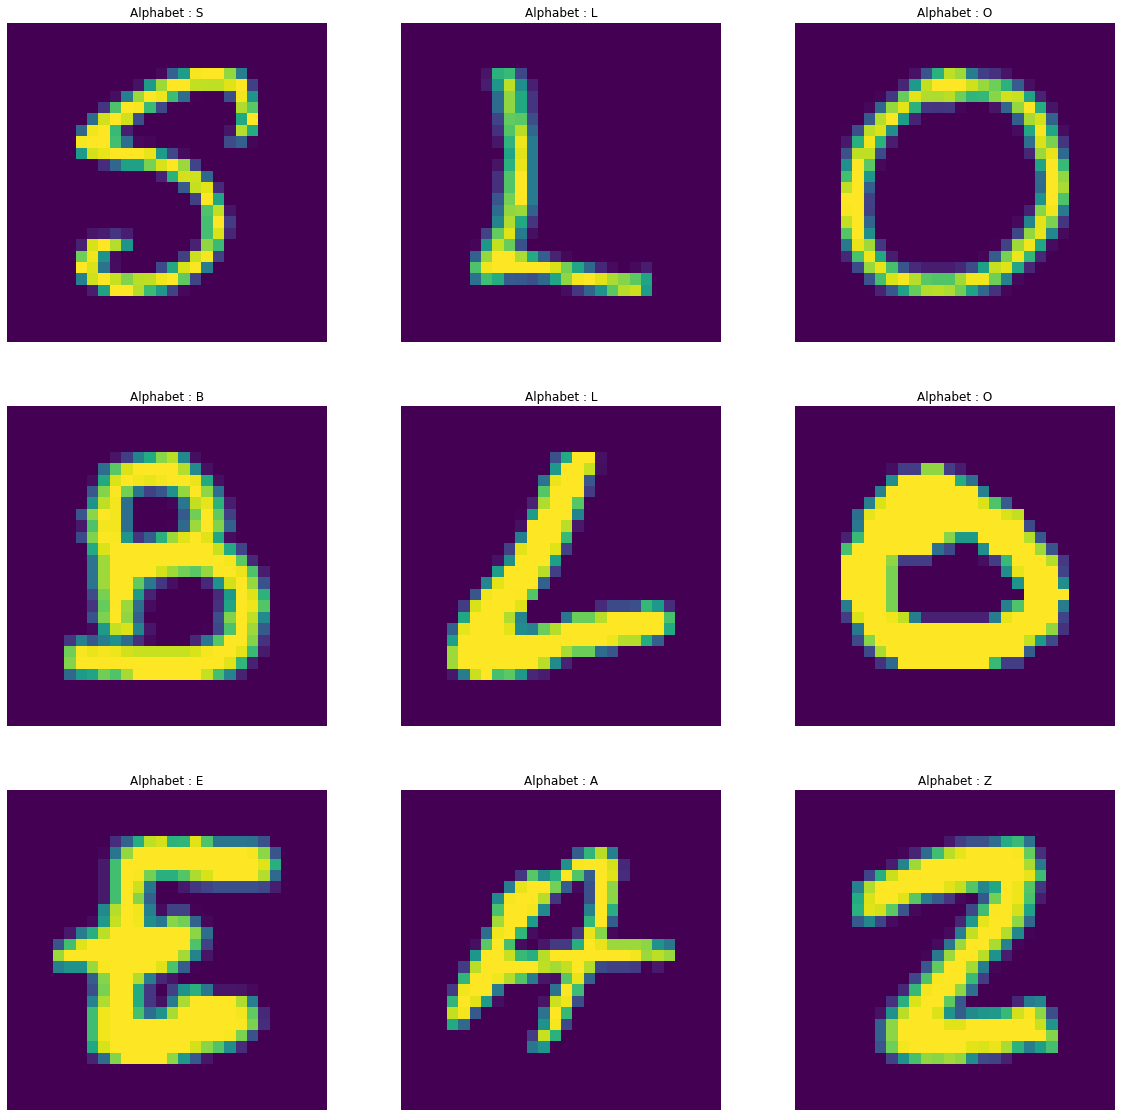

In [17]:
fig,axis = plt.subplots(3,3,figsize = (20,20))
for i ,ax in enumerate(axis.flat):
    ax.imshow(X_train[i].reshape(28,28))
    ax.axis('off')
    ax.set(title = f"Alphabet : { letters_dict [y_train[i].argmax()] }")
    

model=Sequential()
model.add(Conv2D(activation='relu',filters=32,kernel_size=(5,5),padding='same',input_shape=(IMG_WIDTH,IMG_HEIGHT,IMG_CHANNEL)))
model.add(BatchNormalization())
model.add (MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=                                                    (3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add (MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add (MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add (MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))



model.add(Dense(26,activation='softmax'))

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(26,activation='softmax'))






In [ ]:
#from tensorflow.keras.callbacks import ReduceLROnPlateau

In [19]:
model.compile(optimizer= Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))